<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

C:\Users\valentina.chimitova\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [3]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


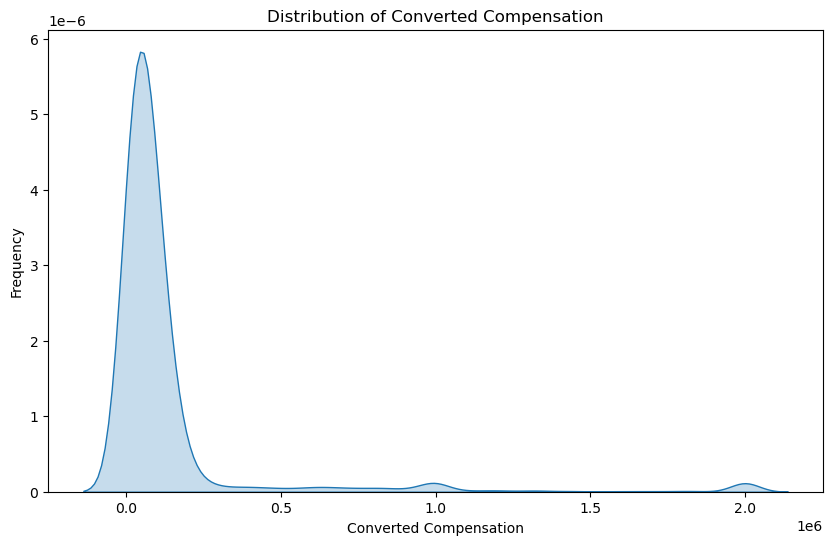

In [4]:
# your code goes here
plt.figure(figsize=(10, 6))
sns.kdeplot(df, x='ConvertedComp', fill=True)
plt.title('Distribution of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.show()

Plot the histogram for the column `ConvertedComp`.


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


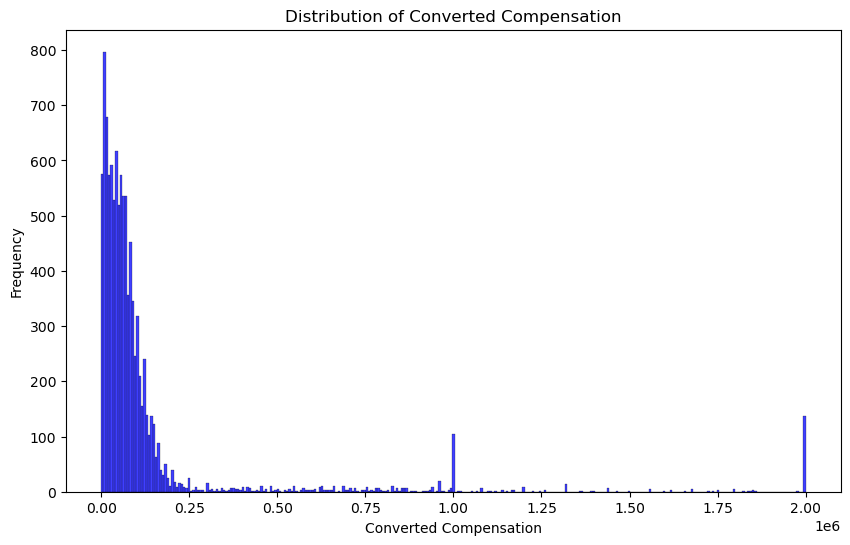

In [5]:
# your code goes here
plt.figure(figsize=(10, 6))
sns.histplot(df['ConvertedComp'], color='blue')
plt.title('Distribution of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.show()

What is the median of the column `ConvertedComp`?


In [6]:
# your code goes here
median_CC = df['ConvertedComp'].median()
print('The median of the Converted Compensation =', median_CC)


The median of the Converted Compensation = 57745.0


How many responders identified themselves only as a **Man**?


In [7]:
df['Gender'].value_counts()

Gender
Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: count, dtype: int64

In [8]:
gen_Man = (df['Gender'] == 'Man').sum()
print('Number of responders identified themselves only as a Man =', gen_Man)

Number of responders identified themselves only as a Man = 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [9]:
# your code goes here
df_Woman = df.loc[df['Gender'] == 'Woman'].reset_index()
print('The median Converted Compensation of responders identified themselves only as a Woman', df_Woman['ConvertedComp'].median())

The median Converted Compensation of responders identified themselves only as a Woman 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [10]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


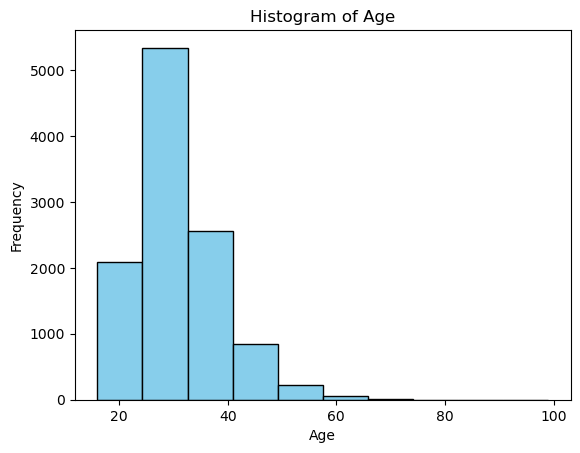

In [11]:
# your code goes here
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')

plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


In [45]:
# your code goes here
df_CC = df.loc[:,'ConvertedComp'].transpose()
df_CC

0         61000.0
1         95179.0
2         90000.0
3        455352.0
4         65277.0
           ...   
11393    130000.0
11394     19880.0
11395    105000.0
11396     80371.0
11397         NaN
Name: ConvertedComp, Length: 11398, dtype: float64

In [65]:
df_CC.median()

57745.0

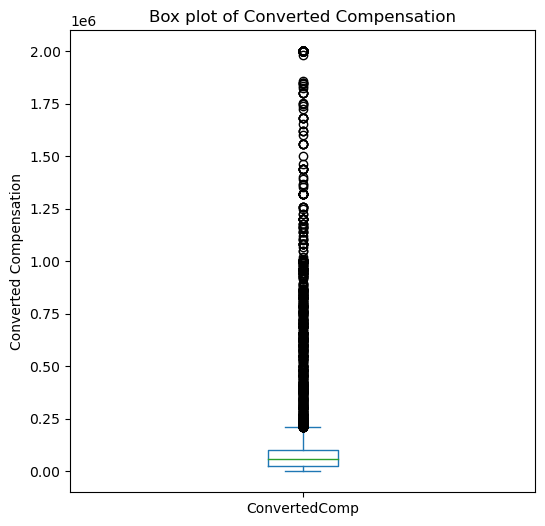

In [27]:
df_CC.plot(kind='box', figsize=(6, 6))

plt.title('Box plot of Converted Compensation')
plt.ylabel('Converted Compensation')

plt.show()

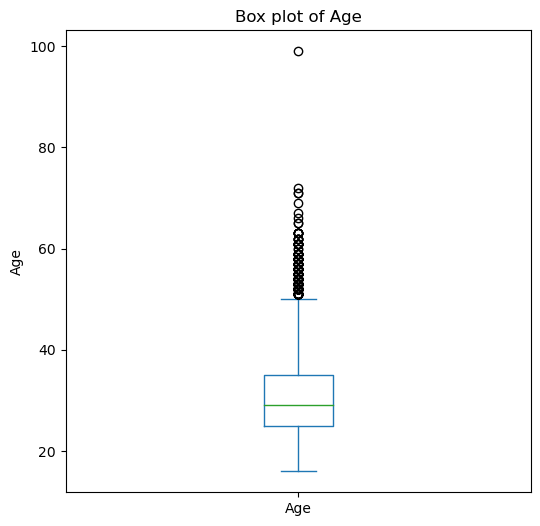

In [67]:
df['Age'].plot(kind='box', figsize=(6, 6))

plt.title('Box plot of Age')
plt.ylabel('Age')

plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [28]:
# your code goes here
df_CC.describe()

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [29]:
Q1 = df_CC.quantile(0.25)
Q3 = df_CC.quantile(0.75)

IQR = Q3 - Q1

print("Inter Quartile Range (IQR) for ConvertedComp:", IQR)

Inter Quartile Range (IQR) for ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [30]:
# your code goes here
# Lower Bound
lower_bound = Q1 - 1.5 * IQR

# Upper Bound
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: -82830.0
Upper Bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [41]:
# your code goes here
outl_numb = ((df_CC > upper_bound) + (df_CC < lower_bound)).sum()
print('Number of outliers in ConvertedComp column:', outl_numb)

Number of outliers in ConvertedComp column: 879


In [49]:
outliers = (df_CC < lower_bound) | (df_CC > upper_bound)

outliers_count = outliers.sum()

print("Number of outliers in ConvertedComp column:", outliers_count)

Number of outliers in ConvertedComp column: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [46]:
df_CC.shape

(11398,)

In [43]:
df.shape

(11398, 85)

In [51]:
(df['ConvertedComp'] <= upper_bound).sum()

9703

In [53]:
df['ConvertedComp'].isnull().sum()

816

In [52]:
(df['ConvertedComp'] > upper_bound).sum()

879

In [50]:
# your code goes here
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

print("Shape of DataFrame without outliers:", df_no_outliers.shape)

Shape of DataFrame without outliers: (9703, 85)


In [66]:
df_no_outliers['ConvertedComp'].median()

52704.0

In [68]:
df_no_outliers['ConvertedComp'].mean()

59883.20838915799

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [60]:
# your code goes here
numeric_df = df.select_dtypes(include=['int64', 'float64'])

correlation = numeric_df.corr()['Age']

print(correlation)

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


In [63]:
numeric_df = df_no_outliers.select_dtypes(include=['int64', 'float64'])

correlation_no_outliers = numeric_df.corr()['Age']

print(correlation)

Respondent       0.002180
CompTotal        0.006337
ConvertedComp    0.401821
WorkWeekHrs      0.032032
CodeRevHrs      -0.012878
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
